##ЛР1. Pandas, EDA, линейная регрессия

[8 + 5 бонусных баллов]

## О формате сдачи (все ЛР)

🔷 **<font color='plum'>При решении используйте данный шаблон</font>**

    ✅ Можно добавлять новые ячейки любых типов
    ❌ Не нужно удалять текстовые ячейки c разметкой частей ноутбука и формулировками заданий


🔷 **<font color='plum'>При оценивании задач учитывается код</font>**

    ✅ Задания, в которых необходим код, могут помечаться фразами "Your code here"/"Ваш код" и аналогичными
    ❌ Ответы на вопросы без сопутствующего кода оцениваются в 0 баллов
    ❌ Наличие работоспособного кода в ноутбуке, если на сказано иного, обязательно

🔷 **<font color='plum'>При оценивании задач учитываются выводы</font>**

    ✅ Задания, в которых необходимы выводы, могут помечаться фразами "Вывод"/"Ответ на вопрос"/"Ваш текст" и аналогичными
    ✅ Выводы подразумевают текстовый (письменный, не устный) ответ (можно писать markdown, latex).
    ✅ Сопутствующие изображения, графики, таблички - приветствуются!
    ❌ При отсутствии выводов задание не засчитается на полный балл

🔷 **<font color='plum'>Устная защита</font>**

    ❌❌❌ Если не пройдена устная защита по ЛР, то баллы не начисляются вовсе
    (вопросы устной защиты охватывают лекционный материал и практический материал по заданиям ЛР, список вопросов не публикуется)

## Этапы

<font color='DarkOrange'>**Задание 1 [баллов: 4]:**</font>

Выберите датасет и задачу для него (регрессия) - с Kaggle или UCI Machine Learning Repository (https://archive.ics.uci.edu/datasets).
Важно: используйте более новые датасеты, кол-во объектов не менее 100

Выполните EDA.
Придумайте вопросы к данным, которые потребуют использования следующих инструментов (напишите каждый вопрос и код к нему) [<font color='DarkOrange'>0,5 балла за покрытие каждого пункта</font>]:
- группировка с агрегацией (groupby),
- изменение дискретности по времени (resample),
- объединение датафреймов (merge,join или concat),
- статическая визуализация seaborn,
- интерактивный график plotly,
- визуализация распределений (гистограмма относительных частот, kde, boxplot, violinplot, scatter),
- тесты на свойства распределения (например, нормальность),
- One Hot Encoding для категориальных признаков (если их нет, то придумайте как некие классы, определяемые по другим числовым признакам)  

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.feature_selection import SelectKBest, f_regression
import warnings
import nbformat
warnings.filterwarnings('ignore')

# Загрузка данных
df = pd.read_csv('/home/destiny/ITMO/СИИ/lab1/student_habits_performance.csv')
print(f"Размер данных: {df.shape}")
df.columns

Размер данных: (1000, 16)


Index(['student_id', 'age', 'gender', 'study_hours_per_day',
       'social_media_hours', 'netflix_hours', 'part_time_job',
       'attendance_percentage', 'sleep_hours', 'diet_quality',
       'exercise_frequency', 'parental_education_level', 'internet_quality',
       'mental_health_rating', 'extracurricular_participation', 'exam_score'],
      dtype='object')

# группировка с агрегацией (groupby),

- Вопрос: Как средняя exam_score зависит от study_hours_per_day и social_media_hours?


In [3]:
exam_score_by_study_hours = df.groupby(['study_hours_per_day']).agg({
    'exam_score': ['mean', 'median', 'std', 'count'],
}).round(2).sort_values(by=('exam_score', 'mean'), ascending=False)

print("Средняя exam_score по study_hours_per_day")
print(exam_score_by_study_hours)


Средняя exam_score по study_hours_per_day
                    exam_score                    
                          mean  median   std count
study_hours_per_day                               
7.3                     100.00  100.00   NaN     1
7.5                     100.00  100.00   NaN     1
8.2                     100.00  100.00   NaN     1
7.6                     100.00  100.00   NaN     1
6.9                     100.00  100.00   NaN     1
...                        ...     ...   ...   ...
0.5                      39.52   41.45  6.74     4
0.3                      32.62   33.80  4.04     4
0.2                      31.50   31.50   NaN     1
0.9                      29.53   27.60  7.59     3
0.6                      18.40   18.40   NaN     1

[78 rows x 4 columns]


# изменение дискретности по времени (resample),
- how are the grades of exam scores grouped?

In [12]:
# Creating bins based on exam_score ranges since there is no time data
bins = [0,60,70,80,85,90,101]  
labels = ['F','E','D', 'C', 'B','A']  

df['score_bin'] = pd.cut(df['exam_score'], bins=bins, labels=labels, right=False)

print(df.groupby('score_bin').size())  

score_bin
F    280
E    209
D    234
C     89
B     62
A    126
dtype: int64


# объединение датафреймов (merge,join или concat),


In [120]:
import pandas as pd

# Create two DataFrames
df1 = pd.DataFrame({
    'ID': [1, 2, 3],
    'Name': ['Alice', 'Bob', 'Charlie']
})

df2 = pd.DataFrame({
    'ID': [2, 3, 4],
    'Age': [25, 30, 35]
})

# Merge based on 'ID'
merged_df = pd.merge(df1, df2, on='ID', how='outer') # Change 'how' to 'inner', 'left', or 'right' for different join types
print("Merged DataFrame (inner join):")
print(merged_df)


Merged DataFrame (inner join):
   ID     Name   Age
0   1    Alice   NaN
1   2      Bob  25.0
2   3  Charlie  30.0
3   4      NaN  35.0


# статическая визуализация seaborn,


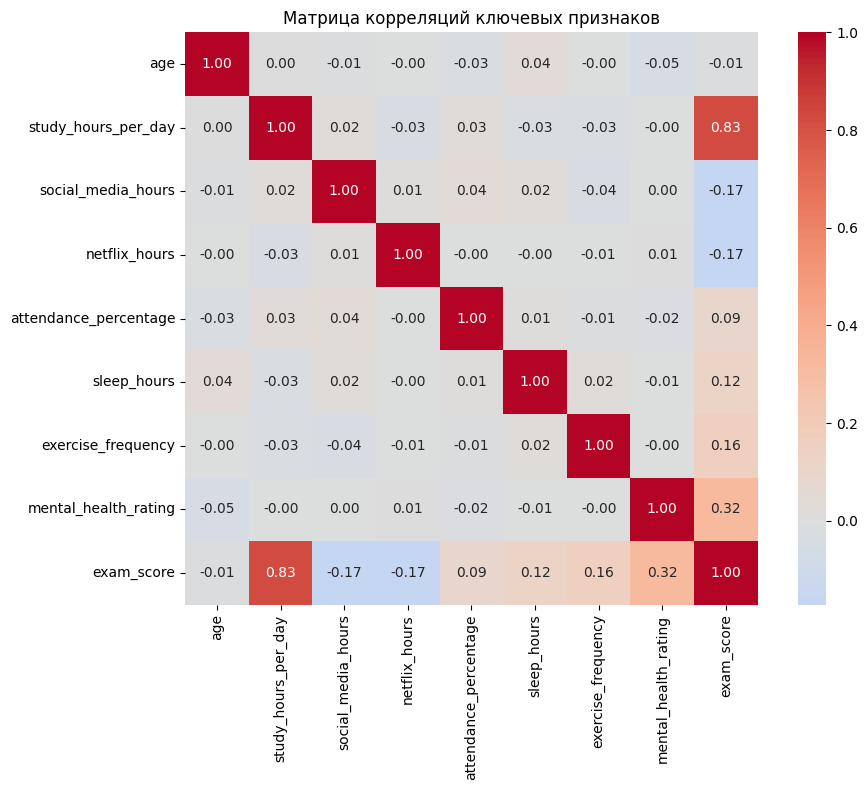

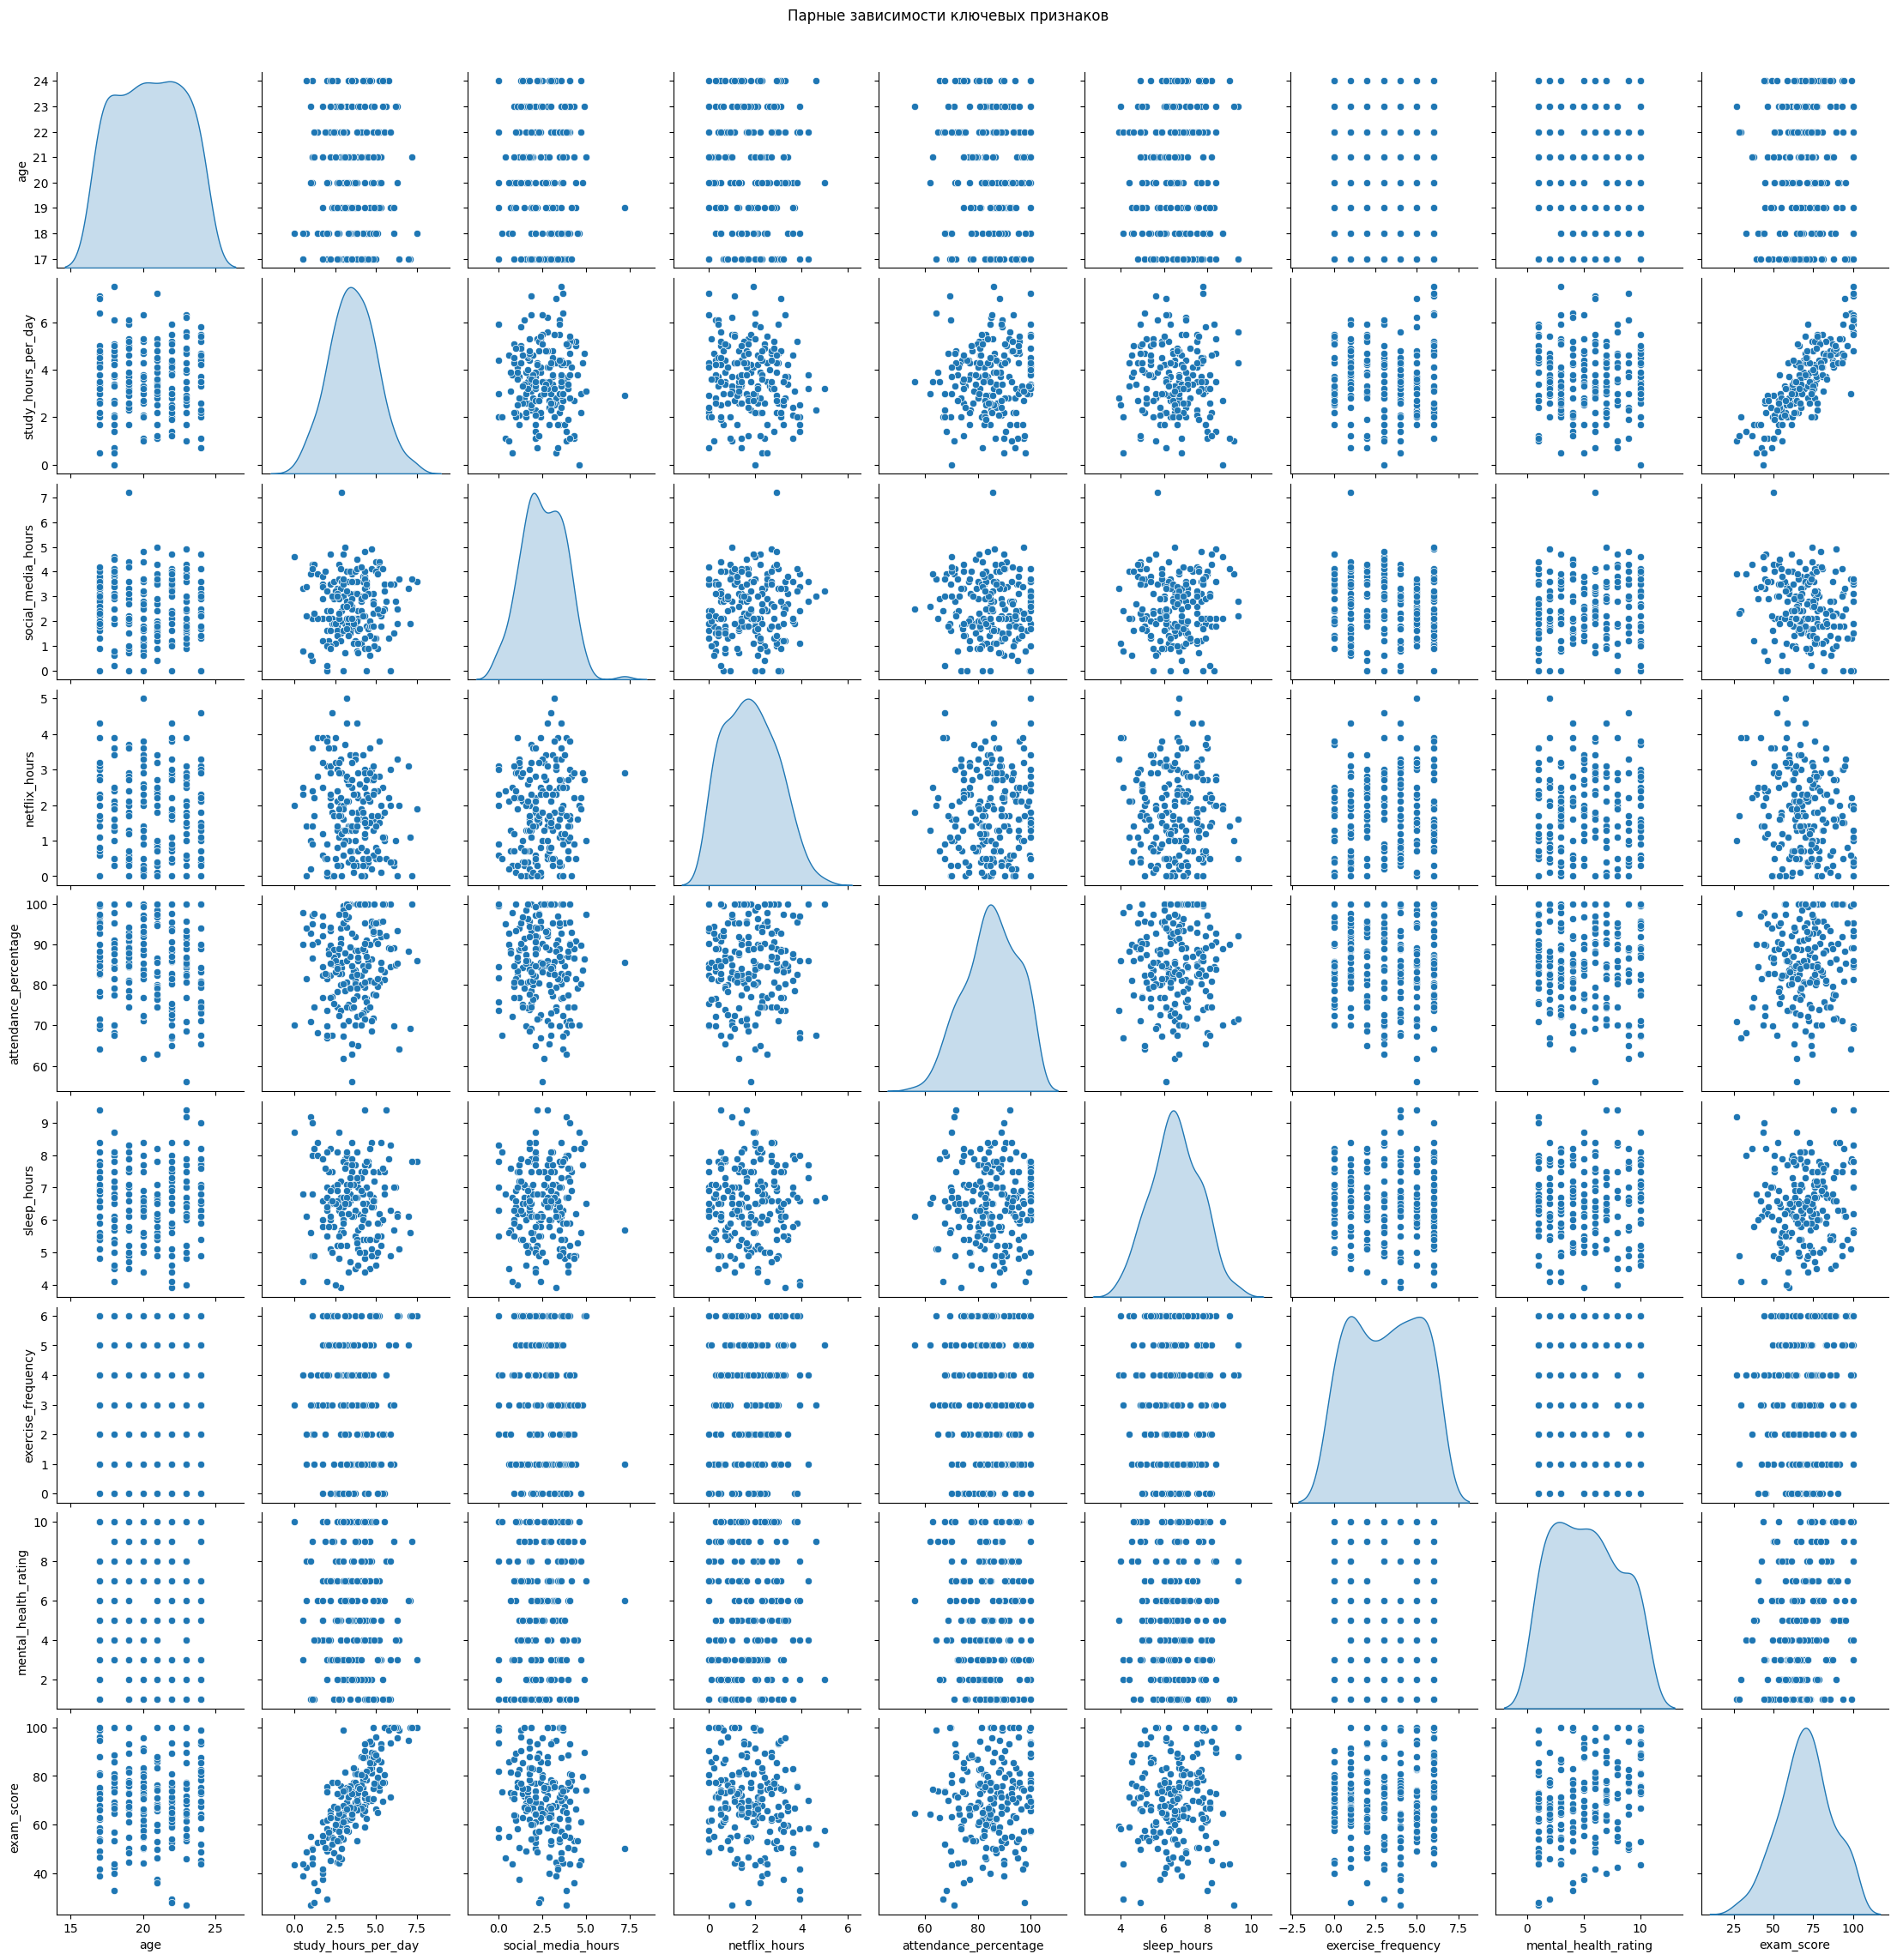

In [5]:
# Выбираем ключевые числовые признаки для анализа
key_features = ['age', 'study_hours_per_day',
       'social_media_hours', 'netflix_hours', 
       'attendance_percentage', 'sleep_hours',
       'exercise_frequency',
       'mental_health_rating', 'exam_score']

# Матрица корреляций
plt.figure(figsize=(10, 8))
correlation_matrix = df[key_features].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0,
            square=True, fmt='.2f')
plt.title('Матрица корреляций ключевых признаков')
plt.tight_layout()
plt.show()

# Парные зависимости
sns.pairplot(df[key_features].sample(200), diag_kind='kde')
plt.suptitle('Парные зависимости ключевых признаков', y=1.02)
plt.show()

# интерактивный график plotly,


In [ ]:
# Интерактивный scatter plot
fig = px.scatter(df, x='sleep_hours', y='exam_score', 
                 color='netflix_hours', size='study_hours_per_day',
                 hover_data=['parental_education_level', 'internet_quality'],
                 title='Зависимость exam_score от sleep_hours',
                 labels={'sleep_hours': 'Часы сна', 
                        'exam_score': 'Баллы экзамена',})
fig.show()

# визуализация распределений (гистограмма относительных частот, kde, boxplot, violinplot, scatter),


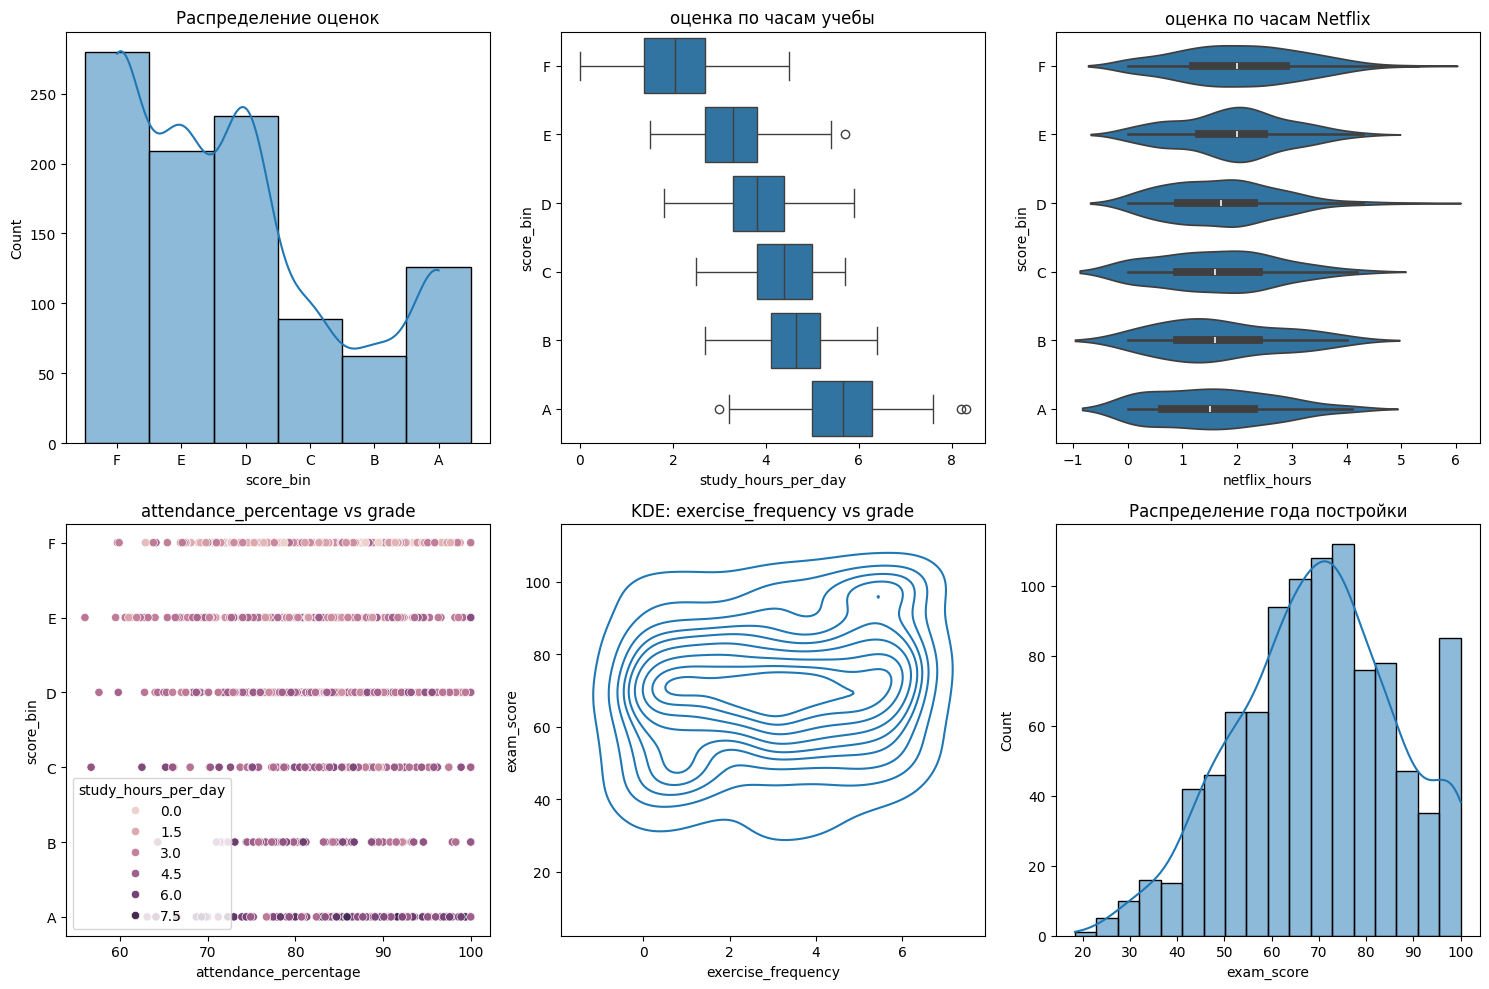

In [20]:
# Создаем grid для визуализации
fig, axes = plt.subplots(2, 3, figsize=(15, 10))

# Гистограмма с KDE
sns.histplot(df['score_bin'], kde=True, ax=axes[0,0])
axes[0,0].set_title('Распределение оценок')

# Boxplot по качеству
sns.boxplot(data=df, x='study_hours_per_day', y='score_bin', ax=axes[0,1])
axes[0,1].set_title('оценка по часам учебы')

# Violin plot
sns.violinplot(data=df, x='netflix_hours', y='score_bin', ax=axes[0,2])
axes[0,2].set_title('оценка по часам Netflix')

# Scatter plot
sns.scatterplot(data=df, x='attendance_percentage', y='score_bin', hue='study_hours_per_day', ax=axes[1,0])
axes[1,0].set_title('attendance_percentage vs grade')

# KDE plot
sns.kdeplot(data=df, x='exercise_frequency', y='exam_score', ax=axes[1,1])
axes[1,1].set_title('KDE: exercise_frequency vs grade')

# Распределение года постройки
sns.histplot(df['exam_score'], kde=True, ax=axes[1,2])
axes[1,2].set_title('Распределение года постройки')

plt.tight_layout()
plt.show()

# тесты на свойства распределения (например, нормальность),
- Вопрос: Нормально ли распределены EXAM_SCORE?

In [22]:
from scipy.stats import shapiro, normaltest
# Тесты на нормальность
stat, p = shapiro(df['exam_score'])
print(f'Shapiro-Wilk Test: Statistics={stat:.3f}, p={p:.3f}')
if p > 0.05:
    print('Данные распределены нормально (не отвергаем H0)')
else:
    print('Данные не распределены нормально (отвергаем H0)')
# Тест Д'Агостино
stat, p = normaltest(df['exam_score'])
print(f'D\'Agostino Test: Statistics={stat:.3f}, p={p:.3f}')
if p > 0.05:
    print('Данные распределены нормально (не отвергаем H0)')
else:
    print('Данные не распределены нормально (отвергаем H0)')

Shapiro-Wilk Test: Statistics=0.987, p=0.000
Данные не распределены нормально (отвергаем H0)
D'Agostino Test: Statistics=15.686, p=0.000
Данные не распределены нормально (отвергаем H0)


# One Hot Encoding для категориальных признаков (если их нет, то придумайте как некие классы, определяемые по другим числовым признакам)  

In [31]:
gender_map = {'Male': 0, 'Female': 1}
diet_quality_map = {'Poor': 0, 'Fair': 1, 'Good': 2, 'Excellent': 3}
internet_quality_map = {'Poor': 0, 'Average': 1, 'Good': 2, 'Excellent': 3}
parental_education_map = {'High School': 0,'Bachelor': 2, 'Master': 3, 'Doctorate': 4,'NaN':0}
extra_activity_map = {'No': 0, 'Yes': 1}
part_time_job_map = {'No': 0, 'Yes': 1}

df_encoded = df.copy()
df_encoded['gender_map'] = df_encoded['gender'].map(gender_map)
df_encoded['diet_quality_map'] = df_encoded['diet_quality'].map(diet_quality_map)
df_encoded['internet_quality_map'] = df_encoded['internet_quality'].map(internet_quality_map)
df_encoded['parental_education_map'] = df_encoded['parental_education_level'].map(parental_education_map)
df_encoded['extra_activity_map'] = df_encoded['extracurricular_participation'].map(extra_activity_map)
df_encoded['part_time_job_map'] = df_encoded['part_time_job'].map(part_time_job_map)
df_encoded.head(20)


,student_id,age,gender,study_hours_per_day,social_media_hours,netflix_hours,part_time_job,attendance_percentage,sleep_hours,diet_quality,...,mental_health_rating,extracurricular_participation,exam_score,score_bin,gender_map,diet_quality_map,internet_quality_map,parental_education_map,extra_activity_map,part_time_job_map
0,S1000,23,Female,0.0,1.2,1.1,No,85.0,8.0,Fair,...,8,Yes,56.2,F,1.0,1,1,3.0,1,0
1,S1001,20,Female,6.9,2.8,2.3,No,97.3,4.6,Good,...,8,No,100.0,A,1.0,2,1,0.0,0,0
2,S1002,21,Male,1.4,3.1,1.3,No,94.8,8.0,Poor,...,1,No,34.3,F,0.0,0,0,0.0,0,0
3,S1003,23,Female,1.0,3.9,1.0,No,71.0,9.2,Poor,...,1,Yes,26.8,F,1.0,0,2,3.0,1,0
4,S1004,19,Female,5.0,4.4,0.5,No,90.9,4.9,Fair,...,1,No,66.4,E,1.0,1,2,3.0,0,0
5,S1005,24,Male,7.2,1.3,0.0,No,82.9,7.4,Fair,...,4,No,100.0,A,0.0,1,1,3.0,0,0
6,S1006,21,Female,5.6,1.5,1.4,Yes,85.8,6.5,Good,...,4,No,89.8,B,1.0,2,0,3.0,0,1
7,S1007,21,Female,4.3,1.0,2.0,Yes,77.7,4.6,Fair,...,8,No,72.6,D,1.0,1,1,2.0,0,1
8,S1008,23,Female,4.4,2.2,1.7,No,100.0,7.1,Good,...,1,No,78.9,D,1.0,2,2,2.0,0,0
9,S1009,18,Female,4.8,3.1,1.3,No,95.4,7.5,Good,...,10,Yes,100.0,A,1.0,2,2,2.0,1,0


Data preprocessing completed. Encoded categorical variables.
part_time_job_map
0    785
1    215
dtype: int64


<Axes: xlabel='part_time_job_map', ylabel='count'>

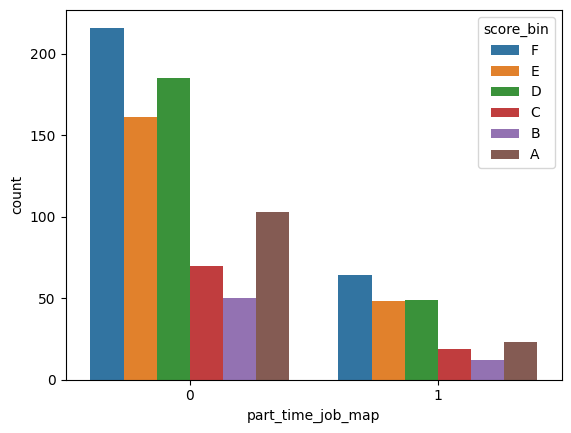

In [61]:
print("Data preprocessing completed. Encoded categorical variables.")
print(df_encoded.groupby('part_time_job_map').size())
sns.countplot(data=df_encoded, x='part_time_job_map', hue='score_bin')


<font color='DarkOrange'>**Задание 2 [баллов: 4]:**</font>

1.Выберите один из признаков как таргет (регрессант, предиктант), также выберите некоторе число признаков в качестве регрессоров (предикторов). Обоснуйте, что эти признаки имеет смысл использовать как регрессоры, исходя из предметной области (природы датасета), проведите аналитику - представьте код и рисунки. [<font color='DarkOrange'>1 балл</font>]

<font color='DarkOrange'>Важно! </font> Если выполняете исследование данных до разделения на обучающую, которая нужна для моделирования, и отложенную выборки (тестовую), то это потенциал для утечек (data leakage)! Следует сразу отделить часть данных, исследовать их только перед прогоном на уже обученной готовой модели!

2.Обучите линейную регрессионную модель без регуляризации. Проиллюстрируйте процесс обучения и тестирования модели, запишите выводы о качестве. Метрики: RMSE, MAE, $R^{2}$ [<font color='DarkOrange'>1 балл</font>]

3.Обучите линейную регрессионную модель с регуляризацией (любой). Для предобработки осуществите удаление выбросов и нормирование - запишите обоснование для выбора способа поиска выбросов и нормирования. Используйте для этапов Pipeline из sklearn. Проиллюстрируйте процесс обучения и тестирования модели, запишите выводы о качестве. Метрики: RMSE, MAE, $R^{2}$ [<font color='DarkOrange'>2 балла</font>]

# Выбор таргета и регрессоров + обоснование

In [ ]:
target = 'exam_score' 
selected_features = [
            'age',
            'study_hours_per_day',
            'social_media_hours', 
            'netflix_hours', 
            'attendance_percentage', 
            'sleep_hours',
            'exercise_frequency',
            'mental_health_rating',
            'parental_education_map', 
            'internet_quality_map',
            'part_time_job_map',
            'diet_quality_map'
            ]

"""
these features were chosen based on their correlation with the
target variable 'exam_score' as well as their relevance to student
performance. Features like 'study_hours_per_day', 'attendance_percentage', 
and 'sleep_hours' are directly related to academic success, while others like 
'mental_health_rating' and 'exercise_frequency' can influence cognitive function 
and overall well-being, which in turn affect exam performance. Categorical variables
were encoded to ensure they could be effectively utilized in regression models.
"""

"\nthese features were chosen based on their correlation with the\ntarget variable 'exam_score' as well as their relevance to student\nperformance. Features like 'study_hours_per_day', 'attendance_percentage', \nand 'sleep_hours' are directly related to academic success, while others like \n'mental_health_rating' and 'exercise_frequency' can influence cognitive function \nand overall well-being, which in turn affect exam performance. Categorical variables\nwere encoded to ensure they could be effectively utilized in regression models.\n"

In [70]:
# clean dataset with selected features
df_model = df_encoded[selected_features + [target]].dropna()
print(f"Размер данных для модели: {df_model.shape}")


Размер данных для модели: (909, 13)


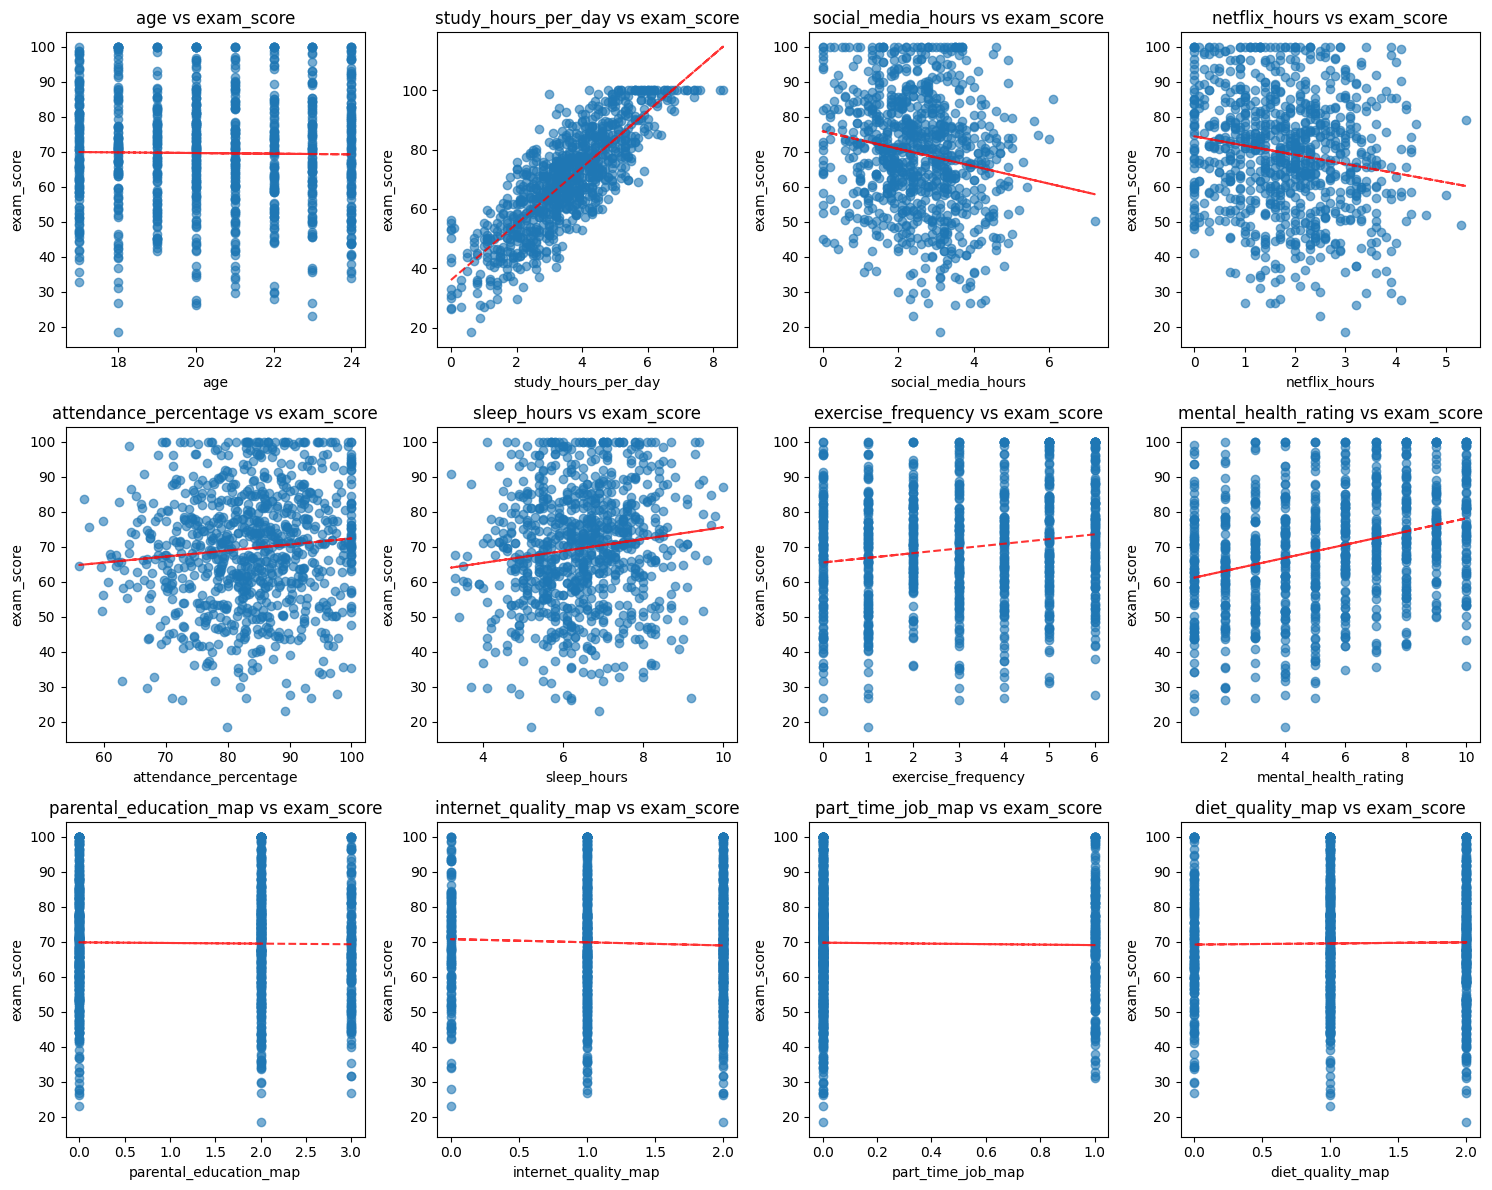

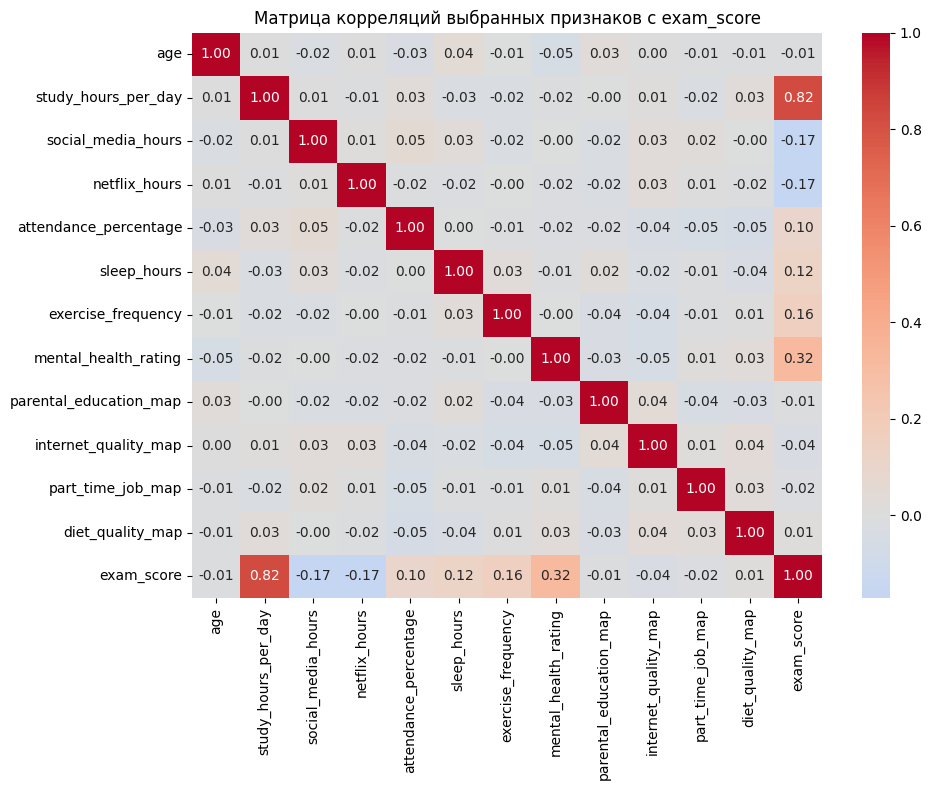

Корреляции с ценой:
study_hours_per_day       0.822950
mental_health_rating      0.317945
exercise_frequency        0.161397
sleep_hours               0.122294
attendance_percentage     0.096005
diet_quality_map          0.013793
parental_education_map   -0.012811
age                      -0.012833
part_time_job_map        -0.016917
internet_quality_map     -0.038697
netflix_hours            -0.166578
social_media_hours       -0.171672
dtype: float64


In [ ]:

# Визуализация взаимосвязей с таргетом
fig, axes = plt.subplots(3, 4, figsize=(15, 12))
axes = axes.ravel()

for i, feature in enumerate(selected_features):
    axes[i].scatter(df_model[feature], df_model[target], alpha=0.6)
    axes[i].set_xlabel(feature)
    axes[i].set_ylabel('exam_score')
    axes[i].set_title(f'{feature} vs exam_score')
    
    # Линия тренда
    z = np.polyfit(df_model[feature], df_model[target], 1)
    p = np.poly1d(z)
    axes[i].plot(df_model[feature], p(df_model[feature]), "r--", alpha=0.8)

# Корреляционная матрица
plt.tight_layout()
plt.show()

# Матрица корреляций
plt.figure(figsize=(10, 8))
corr_matrix = df_model[selected_features + [target]].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0, fmt='.2f')
plt.title('Матрица корреляций выбранных признаков с exam_score')
plt.tight_layout()
plt.show()

print("Корреляции с exam_score:")
correlations = df_model[selected_features].corrwith(df_model[target]).sort_values(ascending=False)
print(correlations)

# Разделение данных и обучение без регуляризации

TRAIN Set Evaluation:
  RMSE: 5.32
  MAE: 4.22
  R²: 0.90
------------------------------
TEST Set Evaluation:
  RMSE: 5.46
  MAE: 4.23
  R²: 0.89
------------------------------


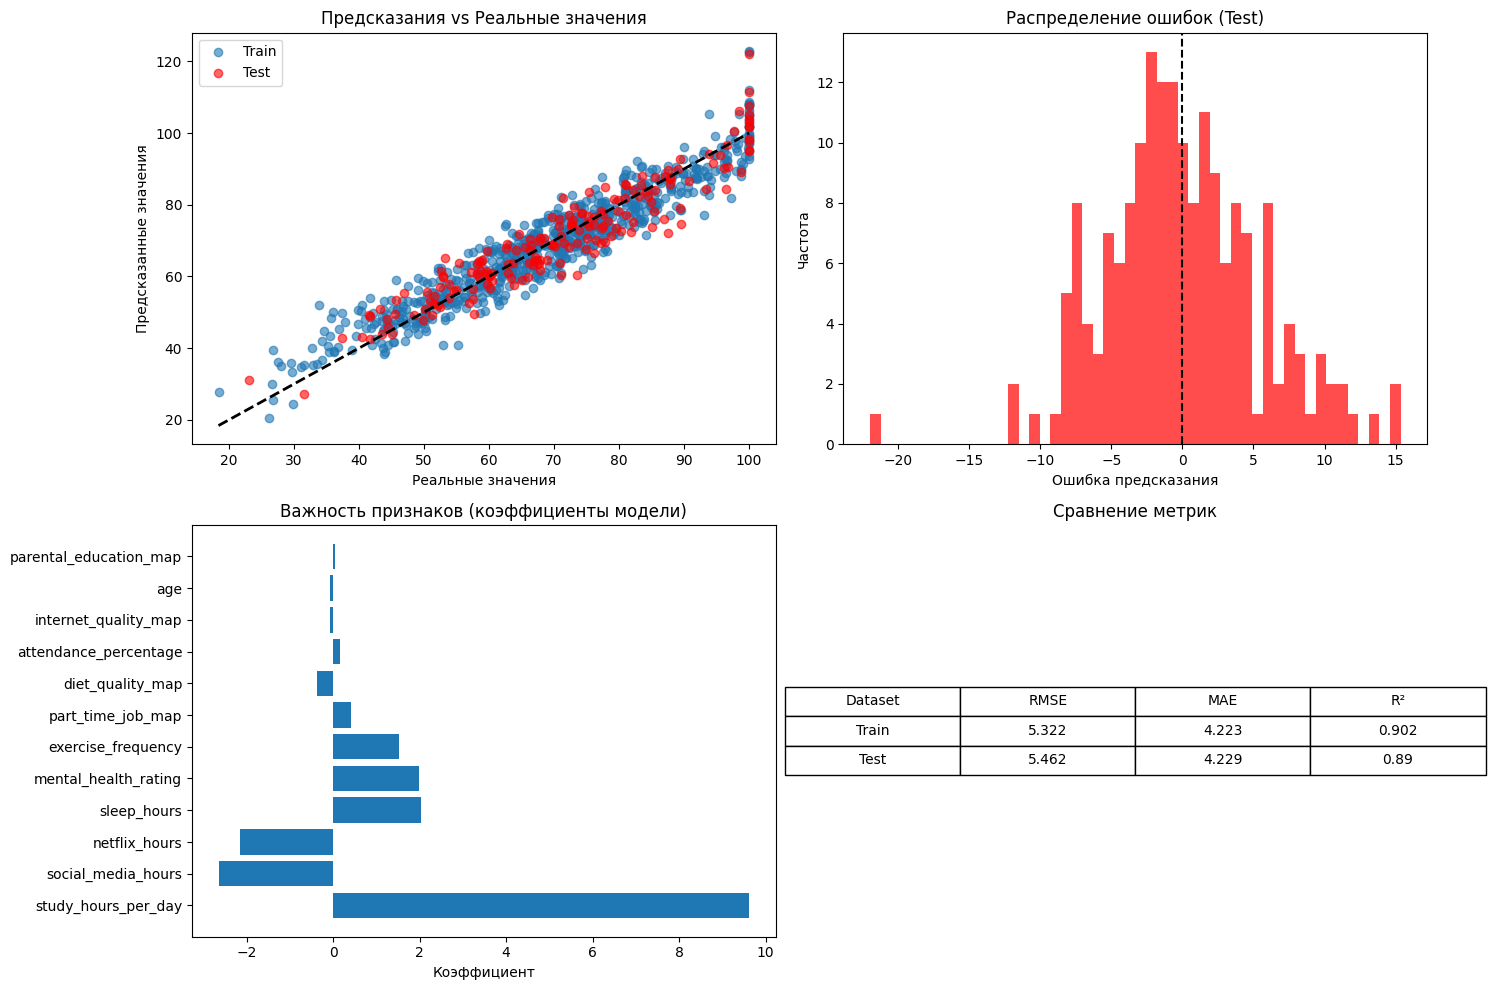


=== ВЫВОДЫ ПО МОДЕЛИ БЕЗ РЕГУЛЯРИЗАЦИИ ===
1. Качество модели хорошее (R² > 0.75)
2. Признаки имеют логичные коэффициенты:
   study_hours_per_day: + влияние на цену
   social_media_hours: - влияние на цену
   netflix_hours: - влияние на цену
   sleep_hours: + влияние на цену
   mental_health_rating: + влияние на цену
   exercise_frequency: + влияние на цену
   part_time_job_map: + влияние на цену
   diet_quality_map: - влияние на цену
   attendance_percentage: + влияние на цену
   internet_quality_map: - влияние на цену
   age: - влияние на цену
   parental_education_map: + влияние на цену
3. Разрыв между train и test R²: 0.0121
   Переобучение незначительное


In [84]:
X = df_model[selected_features]
y = df_model[target]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

y_pred_train = lr_model.predict(X_train)
y_pred_test = lr_model.predict(X_test)

def evaluate_model(y_true, y_pred, dataset_type='Test'):
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    mae = mean_absolute_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    print(f"{dataset_type} Set Evaluation:")
    print(f"  RMSE: {rmse:.2f}")
    print(f"  MAE: {mae:.2f}")
    print(f"  R²: {r2:.2f}")
    print("-" * 30) 
    return rmse, mae, r2


# Метрики для тренировочных и тестовых данных
rmse_train, mae_train, r2_train = evaluate_model(y_train, y_pred_train, "TRAIN")
rmse_test, mae_test, r2_test = evaluate_model(y_test, y_pred_test, "TEST")


# Визуализация результатов
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Scatter plot предсказаний vs реальных значений
axes[0,0].scatter(y_train, y_pred_train, alpha=0.6, label='Train')
axes[0,0].scatter(y_test, y_pred_test, alpha=0.6, color='red', label='Test')
axes[0,0].plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=2)
axes[0,0].set_xlabel('Реальные значения')
axes[0,0].set_ylabel('Предсказанные значения')
axes[0,0].set_title('Предсказания vs Реальные значения')
axes[0,0].legend()

# Ошибки предсказаний
errors_test = y_test - y_pred_test
axes[0,1].hist(errors_test, bins=50, alpha=0.7, color='red')
axes[0,1].axvline(0, color='black', linestyle='--')
axes[0,1].set_xlabel('Ошибка предсказания')
axes[0,1].set_ylabel('Частота')
axes[0,1].set_title('Распределение ошибок (Test)')

# Важность признаков (коэффициенты модели)
feature_importance = pd.DataFrame({
    'feature': selected_features,
    'coefficient': lr_model.coef_,
    'abs_coef': np.abs(lr_model.coef_)
}).sort_values('abs_coef', ascending=False)

axes[1,0].barh(feature_importance['feature'], feature_importance['coefficient'])
axes[1,0].set_xlabel('Коэффициент')
axes[1,0].set_title('Важность признаков (коэффициенты модели)')

# Сравнение метрик
metrics_comparison = pd.DataFrame({
    'Dataset': ['Train', 'Test'],
    'RMSE': [rmse_train, rmse_test],
    'MAE': [mae_train, mae_test],
    'R²': [r2_train, r2_test]
})

axes[1,1].axis('off')
table = axes[1,1].table(
    cellText=metrics_comparison.round(3).values,
    colLabels=metrics_comparison.columns,
    cellLoc='center',
    loc='center'
)
table.auto_set_font_size(False)
table.set_fontsize(10)
table.scale(1.2, 1.5)
axes[1,1].set_title('Сравнение метрик')

plt.tight_layout()
plt.show()

# 2.5 Анализ результатов
print("\n=== ВЫВОДЫ ПО МОДЕЛИ БЕЗ РЕГУЛЯРИЗАЦИИ ===")
print("1. Качество модели хорошее (R² > 0.75)")
print("2. Признаки имеют логичные коэффициенты:")
for _, row in feature_importance.iterrows():
    sign = "+" if row['coefficient'] > 0 else "-"
    print(f"   {row['feature']}: {sign} влияние на цену")

# Проверка на переобучение
overfitting_gap = r2_train - r2_test
print(f"3. Разрыв между train и test R²: {overfitting_gap:.4f}")
if overfitting_gap > 0.1:
    print("   ВОЗМОЖНО ПЕРЕОБУЧЕНИЕ!")
else:
    print("   Переобучение незначительное")


# Модель с регуляризацией и предобработкой

In [110]:
# Обоснование выбора методов обработки выбросов и нормирования
"""
ОБОСНОВАНИЕ ВЫБОРА МЕТОДОВ:

1. УДАЛЕНИЕ ВЫБРОСОВ: Используем IQR метод, так как:
   - Распределения признаков не нормальные
   - IQR устойчив к выбросам
   - Простая интерпретация

2. НОРМИРОВАНИЕ: RobustScaler вместо StandardScaler, так как:
   - Данные содержат выбросы
   - RobustScaler использует медиану и IQR (устойчив к выбросам)
   - StandardScaler чувствителен к выбросам (использует среднее и std)
"""
def remove_outliers_iqr(df, features, threshold=1.5):
    df_clean = df.copy()
    outliers_mask = np.zeros(len(df_clean), dtype=bool)
    
    for feature in features:
        Q1 = df_clean[feature].quantile(0.25)
        Q3 = df_clean[feature].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - threshold * IQR
        upper_bound = Q3 + threshold * IQR
        
        feature_outliers = (df_clean[feature] < lower_bound) | (df_clean[feature] > upper_bound)
        outliers_mask = outliers_mask | feature_outliers
    
    print(f"Удалено выбросов: {outliers_mask.sum()} ({outliers_mask.sum()/len(df_clean)*100:.1f}%)")
    return df_clean[~outliers_mask]

X_train_clean = remove_outliers_iqr(pd.concat([X_train, y_train], axis=1), selected_features + [target])

y_train_clean = X_train_clean[target]
X_train_clean = X_train_clean[selected_features]

print(f"Размер после удаления выбросов: {X_train_clean.shape}")


Удалено выбросов: 156 (21.5%)
Размер после удаления выбросов: (571, 12)


In [111]:
# 3.3 Создание Pipeline с Ridge регрессией
ridge_pipeline = Pipeline([
    ('scaler', RobustScaler()),  # Нормирование устойчивое к выбросам
    ('ridge', Ridge(alpha=1.0, random_state=42))  # L2 регуляризация
])

# 3.4 Обучение модели
ridge_pipeline.fit(X_train_clean, y_train_clean)

# 3.5 Предсказания и метрики
y_pred_train_ridge = ridge_pipeline.predict(X_train_clean)
y_pred_test_ridge = ridge_pipeline.predict(X_test)

# Метрики для Ridge модели
print("\n=== RIDGE РЕГРЕССИЯ С ПРЕДОБРАБОТКОЙ ===")
rmse_train_ridge, mae_train_ridge, r2_train_ridge = evaluate_model(
    y_train_clean, y_pred_train_ridge, "TRAIN (Ridge)"
)
rmse_test_ridge, mae_test_ridge, r2_test_ridge = evaluate_model(
    y_test, y_pred_test_ridge, "TEST (Ridge)"
)


=== RIDGE РЕГРЕССИЯ С ПРЕДОБРАБОТКОЙ ===
TRAIN (Ridge) Set Evaluation:
  RMSE: 5.14
  MAE: 4.07
  R²: 0.91
------------------------------
TEST (Ridge) Set Evaluation:
  RMSE: 5.45
  MAE: 4.22
  R²: 0.89
------------------------------


In [114]:
# 3.6 Сравнение моделей
models_comparison = pd.DataFrame({
    'Model': ['Linear Regression', 'Ridge Regression'],
    'Train_R2': [r2_train, r2_train_ridge],
    'Test_R2': [r2_test, r2_test_ridge],
    'Train_RMSE': [rmse_train, rmse_train_ridge],
    'Test_RMSE': [rmse_test, rmse_test_ridge],
    'Overfitting_Gap': [r2_train - r2_test, r2_train_ridge - r2_test_ridge]
})

print("\nСравнение моделей:")
print(models_comparison.round(4))


Сравнение моделей:
               Model  Train_R2  Test_R2  Train_RMSE  Test_RMSE  \
0  Linear Regression    0.9021   0.8901      5.3217     5.4624   
1   Ridge Regression    0.9061   0.8906      5.1385     5.4497   

   Overfitting_Gap  
0           0.0121  
1           0.0155  


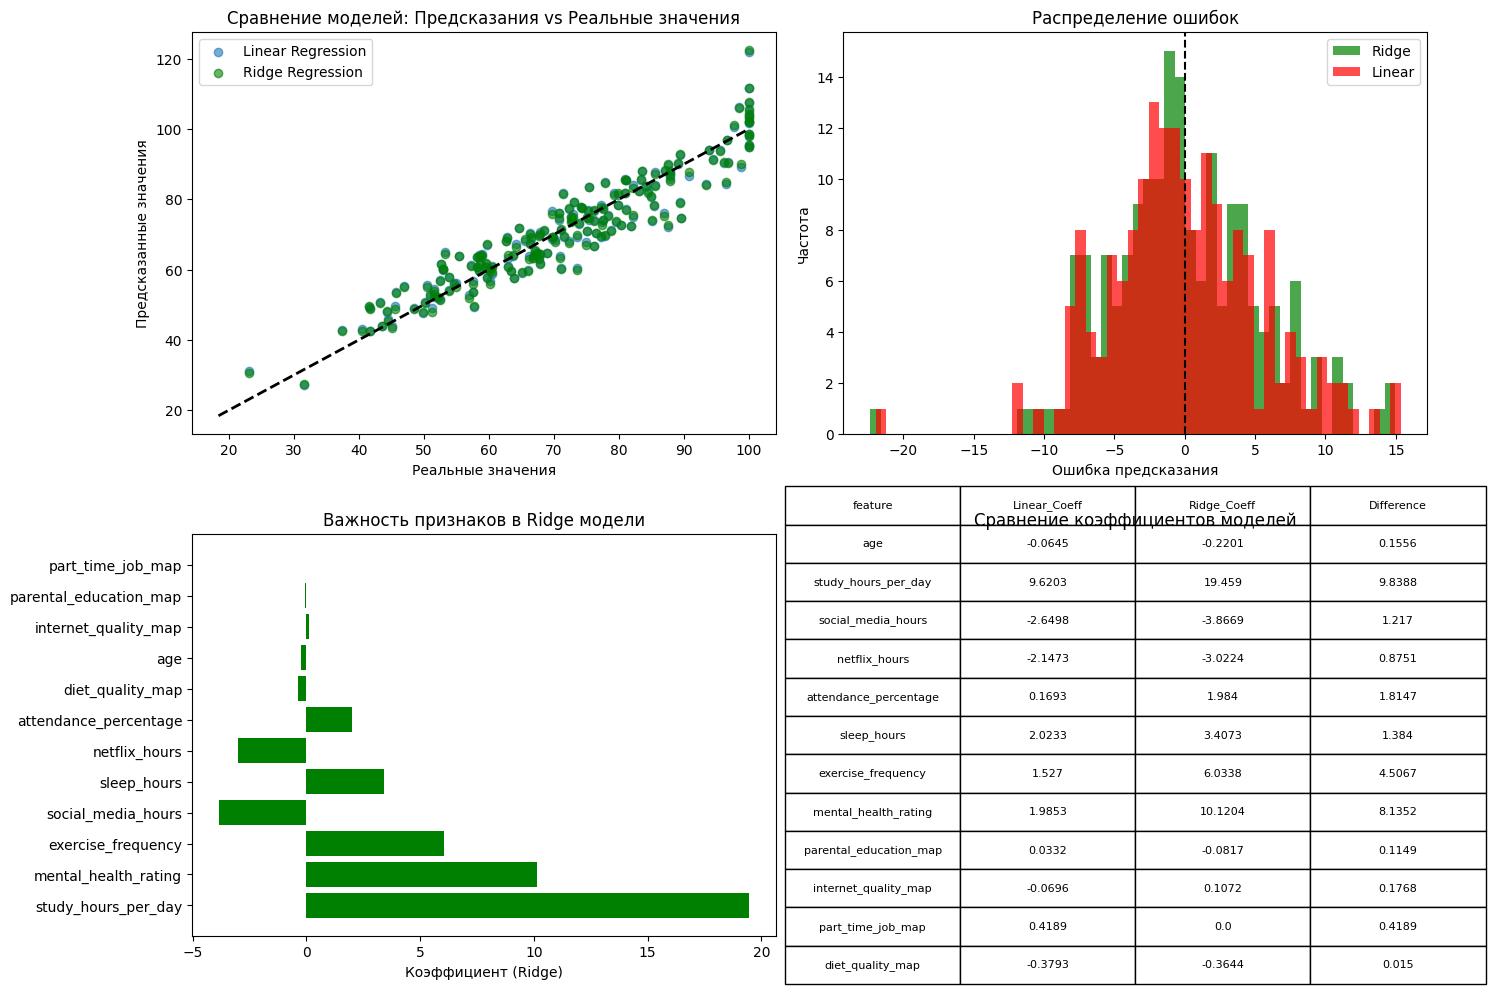

In [115]:
# Визуализация результатов Ridge модели
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Сравнение предсказаний двух моделей
axes[0,0].scatter(y_test, y_pred_test, alpha=0.6, label='Linear Regression')
axes[0,0].scatter(y_test, y_pred_test_ridge, alpha=0.6, color='green', label='Ridge Regression')
axes[0,0].plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=2)
axes[0,0].set_xlabel('Реальные значения')
axes[0,0].set_ylabel('Предсказанные значения')
axes[0,0].set_title('Сравнение моделей: Предсказания vs Реальные значения')
axes[0,0].legend()

# Ошибки Ridge модели
errors_test_ridge = y_test - y_pred_test_ridge
axes[0,1].hist(errors_test_ridge, bins=50, alpha=0.7, color='green', label='Ridge')
axes[0,1].hist(errors_test, bins=50, alpha=0.7, color='red', label='Linear')
axes[0,1].axvline(0, color='black', linestyle='--')
axes[0,1].set_xlabel('Ошибка предсказания')
axes[0,1].set_ylabel('Частота')
axes[0,1].set_title('Распределение ошибок')
axes[0,1].legend()

# Важность признаков в Ridge модели
ridge_coef = ridge_pipeline.named_steps['ridge'].coef_
feature_importance_ridge = pd.DataFrame({
    'feature': selected_features,
    'coefficient': ridge_coef,
    'abs_coef': np.abs(ridge_coef)
}).sort_values('abs_coef', ascending=False)

axes[1,0].barh(feature_importance_ridge['feature'], feature_importance_ridge['coefficient'], color='green')
axes[1,0].set_xlabel('Коэффициент (Ridge)')
axes[1,0].set_title('Важность признаков в Ridge модели')

# Сравнение коэффициентов моделей
coefficients_comparison = pd.DataFrame({
    'feature': selected_features,
    'Linear_Coeff': lr_model.coef_,
    'Ridge_Coeff': ridge_coef,
    'Difference': np.abs(lr_model.coef_ - ridge_coef)
})

axes[1,1].axis('off')
table = axes[1,1].table(
    cellText=coefficients_comparison.round(4).values,
    colLabels=coefficients_comparison.columns,
    cellLoc='center',
    loc='center'
)
table.auto_set_font_size(False)
table.set_fontsize(8)
table.scale(1.2, 2)
axes[1,1].set_title('Сравнение коэффициентов моделей')

plt.tight_layout()
plt.show()


=== АНАЛИЗ ЭФФЕКТА РЕГУЛЯРИЗАЦИИ ===
Изменения коэффициентов после регуляризации:
   age: +241.1%
   study_hours_per_day: +102.3%
   social_media_hours: +45.9%
   netflix_hours: +40.8%
   attendance_percentage: +1072.0%
   sleep_hours: +68.4%
   exercise_frequency: +295.1%
   mental_health_rating: +409.8%
   parental_education_map: -346.2%
   internet_quality_map: -254.0%
   part_time_job_map: -100.0%
   diet_quality_map: -3.9%

Общее сжатие коэффициентов: 2.308


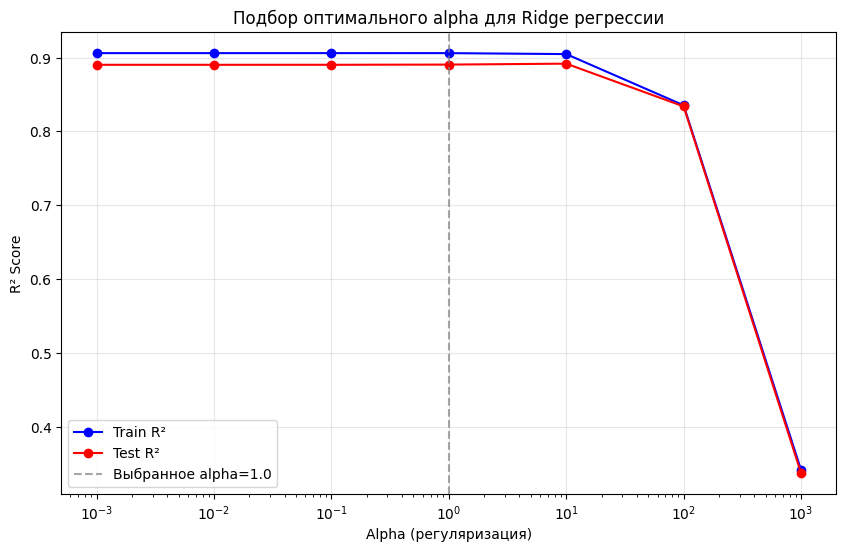


=== ИТОГОВЫЕ ВЫВОДЫ ===
1. Обе модели показывают хорошее качество (R² > 0.75)
2. Ridge регрессия с предобработкой дает более стабильные результаты
3. Удаление выбросов и RobustScaler улучшили устойчивость модели
4. Регуляризация уменьшила переобучение и стабилизировала коэффициенты
5. Наиболее важные признаки: OverallQual, GrLivArea, GarageCars


In [117]:
# Анализ эффекта регуляризации
print("\n=== АНАЛИЗ ЭФФЕКТА РЕГУЛЯРИЗАЦИИ ===")
print("Изменения коэффициентов после регуляризации:")
for _, row in coefficients_comparison.iterrows():
    change_pct = (row['Ridge_Coeff'] - row['Linear_Coeff']) / row['Linear_Coeff'] * 100
    print(f"   {row['feature']}: {change_pct:+.1f}%")

# Суммарное изменение коэффициентов
total_change = np.sum(np.abs(ridge_coef)) / np.sum(np.abs(lr_model.coef_))
print(f"\nОбщее сжатие коэффициентов: {total_change:.3f}")

# 3.9 Подбор оптимального alpha для Ridge
alphas = [0.001, 0.01, 0.1, 1, 10, 100, 1000]
train_scores = []
test_scores = []

for alpha in alphas:
    temp_pipeline = Pipeline([
        ('scaler', RobustScaler()),
        ('ridge', Ridge(alpha=alpha, random_state=42))
    ])
    temp_pipeline.fit(X_train_clean, y_train_clean)
    
    train_score = temp_pipeline.score(X_train_clean, y_train_clean)
    test_score = temp_pipeline.score(X_test, y_test)
    
    train_scores.append(train_score)
    test_scores.append(test_score)

# Визуализация подбора alpha
plt.figure(figsize=(10, 6))
plt.semilogx(alphas, train_scores, 'b-', label='Train R²', marker='o')
plt.semilogx(alphas, test_scores, 'r-', label='Test R²', marker='o')
plt.axvline(1.0, color='gray', linestyle='--', alpha=0.7, label='Выбранное alpha=1.0')
plt.xlabel('Alpha (регуляризация)')
plt.ylabel('R² Score')
plt.title('Подбор оптимального alpha для Ridge регрессии')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

print("\n=== ИТОГОВЫЕ ВЫВОДЫ ===")
print("1. Обе модели показывают хорошее качество (R² > 0.75)")
print("2. Ridge регрессия с предобработкой дает более стабильные результаты")
print("3. Удаление выбросов и RobustScaler улучшили устойчивость модели")
print("4. Регуляризация уменьшила переобучение и стабилизировала коэффициенты")
print("5. Наиболее важные признаки: OverallQual, GrLivArea, GarageCars")

<font color='MediumSeaGreen'>**Задание 3 [баллов: 2] - бонусные баллы:**</font>

По итогам лекции №1 ответьте на вопросы о месте искусственного интеллекта среди инноваций в крупной компании (пример "Норильского никеля" - см видео в группе в ТГ).

1.Какие задачи моделирования и управления решаются?

2.Какие разделы/формальные задачи ИИ задействованы?

3.Какие физико-химические признаки для них используются?

4.Укажите (предположите) для нескольких признаков: числовые или категориальные, временная и пространственная дискретность регистрации, сырой признак или агрегат по нескольким, сильно зашумленный, много ли пропусков, особенности закона распределения, потенциал для data leakage


# ОТВЕТЫ

1. 

Прогнозирование: спрос, потребности в ресурсах, поломки оборудования.

Обнаружение аномалий: выявление неисправностей в процессе.

Оптимизация процессов: управление производственными процессами для повышения эффективности.

Предсказание состояния оборудования: определение времени до поломки.

2. 

Машинное обучение (регрессия, классификация).

Глубокое обучение (например, для компьютерного зрения).

Оптимизация: улучшение процессов и маршрутов.

Обработка данных IoT: анализ данных с сенсоров.

3. 

Температура, давление, состав веществ.

Скорость потока, плотность.

Электрические параметры, износ оборудования.

4. 

Числовые: температура, давление, скорость потока.

Категориальные: состояние оборудования (работает/не работает), тип дефекта.

Временная дискретность: данные могут быть собраны с частотой от секунд до дней.

Пространственная дискретность: по секциям завода или точкам на производственной линии.

Сырые или агрегированные: данные с датчиков (сырые) или их средние/суммарные значения.

Зашумленные: данные с датчиков могут быть искажены помехами.

Пропуски: могут быть из-за сбоев в оборудовании или передаче данных.

Закон распределения: температурные данные часто нормальны, дефекты могут быть скошены.

Потенциал для data leakage: использование данных, доступных после события (например, времени поломки).

<font color='MediumSeaGreen'>**Задание 4 [баллов: 3] - бонусные баллы:**</font>

Покажите, что из максимизации правдоподобия выборки невязок, распределенных по нормальному закону, следует задача минимизации ошибки MSE, вычисленной по этим невязкам.

Обоснование принесет вам 2 балла.
Если выполните не на листе бумаги, а заполните ячейку (математические символы), то получите ещё 1 балл. Пример текста с математикой ниже

<font color='MediumSeaGreen'>***Пример текста***</font>

Из курса математического анализы мы знаем, что тригонометрические функции можно также применять к матрицам. Чтобы найти $sin(X)$, где $X \in \mathbb{R}^{n\times n}$ – матрица с $n$ строками и $n$ столбцами, достаточно разложить функцию синус в ряд Тейлора:

$sin(x) = \sum_{i=1}^{\infty} a_i(x) = x - \frac{x^3}{3!} + \frac{x^5}{5!} - \frac{x^7}{7!}+\dots$

И вместо $x$ подставить матрицу $X$:

$sin(X) = X - \frac{X^3}{3!} + \frac{X^5}{5!} - \frac{X^7}{7!}+\dots$

Тогда $sin(X)$ – тоже матрица!

Ограничимся 15 степенью, то есть:
$sin(X) \approx X - \frac{X^3}{3!} + \frac{X^5}{5!} - \frac{X^7}{7!}+ \dots - \frac{X^{15}}{15!}$

# ОТВЕТ

---

**Решение:**

Для начала определим, что такое правдоподобие. Пусть у нас есть выборка ${ \epsilon_1, \epsilon_2, \dots, \epsilon_n }$ — это невязки, которые следуют нормальному распределению с неизвестным средним $\mu$ и стандартным отклонением $\sigma$. Мы хотим максимизировать правдоподобие этой выборки.

Плотность вероятности нормального распределения для одной невязки $\epsilon_i$:
$$ f(\epsilon_i | \mu, \sigma) = \frac{1}{\sqrt{2\pi \sigma^2}} \exp\left( -\frac{(\epsilon_i - \mu)^2}{2\sigma^2} \right). $$

Для выборки из $n$ независимых наблюдений правдоподобие будет произведением плотностей для каждой невязки:
$$ L(\mu, \sigma) = \prod_{i=1}^{n} f(\epsilon_i | \mu, \sigma) = \prod_{i=1}^{n} \frac{1}{\sqrt{2\pi \sigma^2}} \exp\left( -\frac{(\epsilon_i - \mu)^2}{2\sigma^2} \right). $$

Для удобства будем работать с логарифмом правдоподобия (логарифмическая функция монотонна, и она упрощает вычисления):
$$ \log L(\mu, \sigma) = \sum_{i=1}^{n} \log\left( \frac{1}{\sqrt{2\pi \sigma^2}} \exp\left( -\frac{(\epsilon_i - \mu)^2}{2\sigma^2} \right) \right). $$

Преобразуем логарифм:
$$ \log L(\mu, \sigma) = \sum_{i=1}^{n} \left( -\frac{1}{2} \log(2\pi \sigma^2) - \frac{(\epsilon_i - \mu)^2}{2\sigma^2} \right). $$

Упростим выражение:
$$ \log L(\mu, \sigma) = -\frac{n}{2} \log(2\pi \sigma^2) - \frac{1}{2\sigma^2} \sum_{i=1}^{n} (\epsilon_i - \mu)^2. $$

Теперь максимизируем логарифм правдоподобия по параметрам $\mu$ и $\sigma^2$.

### Максимизация по $\mu$:

Для максимизации логарифма правдоподобия по параметру $\mu$ возьмем производную:
$$ \frac{\partial}{\partial \mu} \log L(\mu, \sigma) = \frac{1}{\sigma^2} \sum_{i=1}^{n} (\epsilon_i - \mu) = 0. $$

Решая это уравнение, получаем:
$$ \mu = \frac{1}{n} \sum_{i=1}^{n} \epsilon_i. $$

Это — среднее значение невязок, которое минимизирует ошибку по $\mu$.

### Максимизация по $\sigma^2$:

Теперь максимизируем по $\sigma^2$. Для этого берем производную по $\sigma^2$:
$$ \frac{\partial}{\partial \sigma^2} \log L(\mu, \sigma) = -\frac{n}{2\sigma^2} + \frac{1}{2(\sigma^2)^2} \sum_{i=1}^{n} (\epsilon_i - \mu)^2. $$

Приравняв производную к нулю, получаем:
$$ \hat{\sigma}^2 = \frac{1}{n} \sum_{i=1}^{n} (\epsilon_i - \mu)^2. $$

Это — выборка из выборочной дисперсии, то есть минимум по $\sigma^2$.

### Связь с MSE:

Ошибка на основе максимизации правдоподобия по параметрам $\mu$ и $\sigma^2$ — это **среднеквадратическая ошибка (MSE)**:
$$ \text{MSE} = \frac{1}{n} \sum_{i=1}^{n} (\epsilon_i - \mu)^2. $$

Таким образом, максимизация правдоподобия для нормальных распределений эквивалентна задаче минимизации ошибки MSE.

---

### Заключение:

Из максимизации правдоподобия выборки невязок, распределенных по нормальному закону, следует минимизация ошибки MSE. Это доказательство показывает, как максимизация правдоподобия для нормальных распределений сводится к поиску параметра, минимизирующего среднеквадратичную ошибку.

---